## Basis Expansions and Splines



In [36]:
import numpy as np
import csv

In [37]:
## load data
fname="star.dat"
with open(fname) as csvf:
    f = csv.reader(csvf,delimiter=' ')
    x, y, sig = zip(*f)
    
x = np.array(x,dtype=np.float)
y = np.array(y,dtype=np.float)
sig = np.array(sig,dtype=np.float)

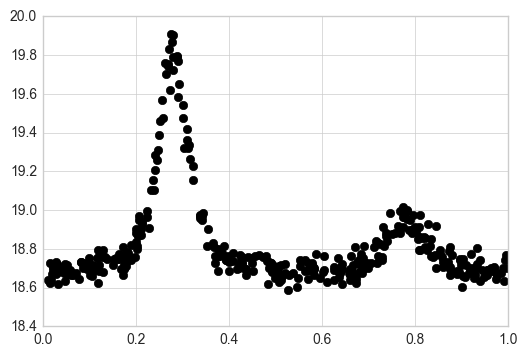

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(x, y, 'o', color='black');

## Polynomial

One option is to represent y as a linear function of $x$, $x^2$, $x^3$, . . . i.e. as a polynomial of x up to some order. This does not work well for any reasonable order because:

* polynomials are not localized, e.g. the coefficient on $x^3$ affects the shape everywhere
* there is a high degree of correlation in the polynomials as the order increases, making it difficult to compute the LS fit, essentially the matrix $(X^TX)$ does not have full column rank.

We demostrate this issue now

In [48]:
p = 50 ## degree of polynomial - 1
X = np.array(list(map(lambda z: x**z,np.arange(p))))
X = np.transpose(X)

In [49]:
beta = np.linalg.lstsq(X, y)
beta = beta[0].reshape((p,1))

In [50]:
import scipy
scipy.linalg.lstsq(X, y)[2]

28

In [29]:
preds = np.matmul(X,beta)[:,0]

Plot best fitting degree $p-1$ polynomial.

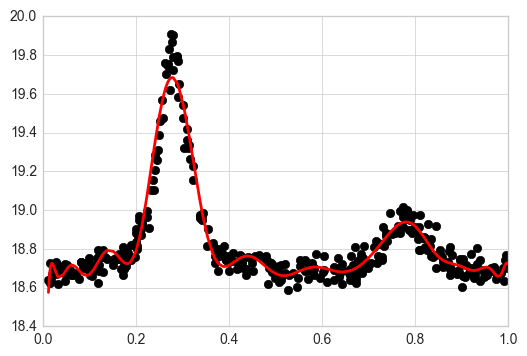

In [30]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, y, 'o', color='black')
plt.plot(x, preds,color='red',linewidth=2.0);

## Eigenvalues, Multicollinearity, Column Rank of Design Matrix $X$

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X, y)

yfit = model.predict(X)
yfit
model.coef_

array([ -8.92212967e+10,   4.55002217e+02,  -3.10781568e+04,
         1.13001823e+06,  -2.49220171e+07,   3.59591905e+08,
        -3.56479293e+09,   2.50860285e+10,  -1.27893352e+11,
         4.76604787e+11,  -1.29200735e+12,   2.47973740e+12,
        -3.11406900e+12,   1.90225495e+12,   8.00563904e+11,
        -2.16116903e+12,   3.80528908e+11,   1.74416666e+12,
        -7.15437241e+11,  -1.46093209e+12,   7.68509447e+11,
         1.28581577e+12,  -7.83461650e+11,  -1.13931327e+12,
         9.90244417e+11,   7.65748762e+11,  -1.52880958e+12,
         9.58424551e+11,  -2.85788138e+11,   3.44241322e+10])

## Splines

## Robust